# Support Vector Machine: EEG of pediatric subjects with epilepsy

Support Vector Machine or SVM is a type of algorithms that establish continious functions that create a surface in the space of the input data and optimize the classification of labeled data. In order to do this several hyperparameters are needed. We must define what type of function will be optimized(e.g. polinomial), the starting coeficients and the weights of each class.

The advantages of support vector machines are:

* Effective in high dimensional spaces.
* Still effective in cases where number of dimensions is greater than the number of samples.
* Uses a subset of training points in the decision function (called support vectors), so it is also memory efficient.
* Versatile: different Kernel functions can be specified for the decision function. Common kernels are provided, but it is also possible to specify custom kernels.

The disadvantages of support vector machines include:
* If the number of features is much greater than the number of samples, avoid over-fitting in choosing Kernel functions and regularization term is crucial.
* SVMs do not directly provide probability estimates, these are calculated using an expensive five-fold cross-validation (see [Scores and probabilities](https://scikit-learn.org/stable/modules/svm.html#scores-probabilities)).



### Importing the packagery:

In [1]:
from seaborn import load_dataset, pairplot, heatmap
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

### Imprting the data:

In [2]:
data=pd.read_csv("Data_medians_4.csv")

In [3]:
del data['Unnamed: 0']
del data['38']

In [4]:
for i in range(0,len(data)):
    if data.iloc[i,-1]!='Awake':
        if data.iloc[i,-1]!='N1':
            if data.iloc[i,-1]!='N2':
                if data.iloc[i,-1]!='N3':
                    if data.iloc[i,-1]!='REM':
                        data.iloc[i,-1]=np.nan

In [5]:
data_2=data.dropna()

In [6]:
data_2

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,39
0,19.911429,21.826667,19.901111,19.076667,21.918889,14.850000,58.638571,60.644444,61.956667,57.580000,...,210.934721,627.235043,648.175431,626.022091,643.377231,540.470154,495.039453,4.422272e+07,0.001152,Awake
1,40.660000,35.816667,38.405556,42.591111,40.958889,37.191667,148.707143,114.740000,116.255556,180.642222,...,601.949326,2122.510839,1710.063114,1684.448166,3062.885569,2100.222584,1750.616297,2.508360e+06,0.002201,N2
2,28.203333,24.951111,25.603333,33.302222,28.286667,24.416667,104.157619,78.117778,77.450000,141.416667,...,395.701329,1433.984345,1147.643210,1131.199674,2268.983257,1375.903119,1170.567469,1.469640e+06,0.001673,REM
3,18.286190,16.575556,17.173333,22.212222,18.586667,15.928333,72.619048,55.015556,55.386667,98.113333,...,258.530174,951.861362,774.702891,776.389821,1493.072896,943.001124,787.208156,5.040967e+06,0.002785,N2
4,11.339524,10.327778,11.073333,9.653333,12.070000,10.046667,42.745238,33.640000,34.700000,37.300000,...,156.242749,587.817203,465.337699,467.104798,546.078070,612.918988,465.555425,9.224363e+06,0.001658,N3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,23.572857,21.060000,22.835556,24.652222,19.970000,18.556667,62.023810,55.311111,62.484444,65.027778,...,233.876713,956.606279,901.840306,1079.626406,1000.445620,627.724242,663.898963,1.033058e+05,0.000996,REM
161,18.736190,16.664444,17.992222,19.476667,16.011111,14.800000,47.885238,42.373333,47.960000,49.993333,...,179.285611,731.916047,694.028468,835.901439,759.237127,474.306587,509.926345,3.701008e+04,0.000528,N1
162,14.926190,13.685556,14.278889,15.434444,12.957778,11.726667,37.418571,33.524444,37.350000,38.766667,...,137.755238,558.178258,505.701924,648.375509,566.989604,363.330987,390.608436,9.521701e+04,0.000363,N2
163,10.816190,9.702222,10.213333,10.985556,9.072222,8.145000,27.838095,24.458889,27.936667,28.534444,...,99.599288,449.385031,411.347601,560.246779,459.417619,270.892424,296.452757,6.754039e+06,0.000063,N3


### Splitting the data

In [7]:
X=data_2.iloc[:,:-1]
Y=data_2.iloc[:,-1]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.75, random_state=100)

## Meaning of each hyperparameter:
#### Warning:  DO NOT RUN THE NEXT LINE OF CODE

In [9]:
# The SVC Class from Sklearn
SVC(C=1.0,              # The regularization parameter
    kernel='rbf',                   # The kernel type used 
    degree=3,                       # Degree of polynomial function 
    gamma='scale',                  # The kernel coefficient
    coef0=0.0,                      # If kernel = 'poly'/'sigmoid'
    shrinking=True,                 # To use shrinking heuristic
    probability=False,              # Enable probability estimates
    tol=0.001,                      # Stopping crierion
    cache_size=200,                 # Size of kernel cache
    class_weight=None,              # The weight of each class
    verbose=False,                  # Enable verbose output
    max_iter=- 1,                   # Hard limit on iterations
    decision_function_shape='ovr',  # One-vs-rest or one-vs-one
    break_ties=False,               # How to handle breaking ties
    random_state=None               # Random state of the model
)

SVC()

## Defining the model

### Wheights:
We expect the algorithm to have difficulties to distinguish bewteen N2 and N3 segments due to the epileptic "noise". To avoid an overfitting of the data, we will lower the weight of this two classes. 

In [9]:
weights = {
  "Awake": 1,
  "N1": 0.5,
  "N2": 0.5,
  "N3": 0.5,
  "REM": 1
}

### kernel and degree:
We will use a polynomial kernel of 3rd degree 

In [ ]:
clf = SVC(kernel='poly', degree=5, gamma='auto', C=1.0,class_weight=weights)
clf.fit(X_train, y_train)

In [11]:
predictions_2 = clf.predict(X_train)

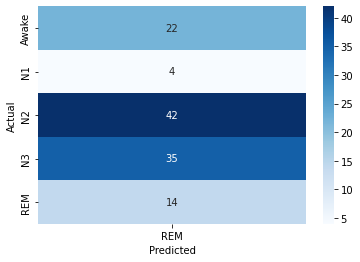

In [12]:
confusion_matrix = pd.crosstab(y_train, predictions_2, rownames=['Actual'], colnames=['Predicted'])

heatmap(confusion_matrix, annot=True, cmap="Blues")
plt.show()

In [111]:
predictions = clf.predict(X_test)
print(predictions)

['Awake' 'Awake' 'Awake' 'Awake' 'Awake' 'Awake' 'Awake' 'Awake' 'Awake'
 'Awake' 'Awake' 'Awake' 'Awake' 'Awake' 'Awake' 'Awake' 'Awake' 'Awake'
 'Awake' 'Awake' 'Awake' 'Awake' 'Awake' 'Awake' 'Awake' 'Awake' 'Awake'
 'Awake' 'Awake' 'Awake' 'Awake' 'Awake' 'Awake' 'Awake' 'Awake' 'Awake'
 'Awake' 'Awake' 'Awake' 'Awake']


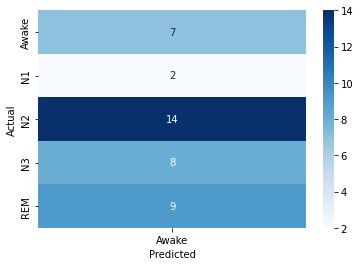

In [112]:
confusion_matrix = pd.crosstab(y_test, predictions, rownames=['Actual'], colnames=['Predicted'])

heatmap(confusion_matrix, annot=True, cmap="Blues")
plt.show()

In [65]:
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF

In [66]:
gauss=GaussianProcessClassifier(1.0 * RBF(1.0),random_state=0)

In [67]:
gauss.fit(X_train, y_train)

GaussianProcessClassifier(kernel=1**2 * RBF(length_scale=1), random_state=0)

In [70]:
predictions_4 = gauss.predict(X_train)

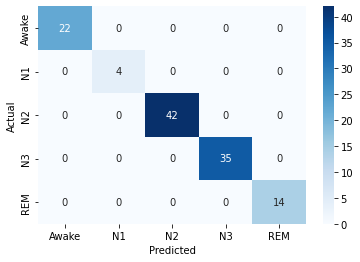

In [74]:
confusion_matrix = pd.crosstab(y_train, predictions_4, rownames=['Actual'], colnames=['Predicted'])

heatmap(confusion_matrix, annot=True, cmap="Blues")
plt.show()

In [75]:
predictions_3 = gauss.predict(X_test)
print(predictions_3)

['REM' 'REM' 'REM' 'REM' 'REM' 'REM' 'REM' 'REM' 'REM' 'REM' 'REM' 'REM'
 'REM' 'REM' 'REM' 'REM' 'REM' 'REM' 'REM' 'REM' 'REM' 'REM' 'REM' 'REM'
 'REM' 'REM' 'REM' 'REM' 'REM' 'REM' 'REM' 'REM' 'REM' 'REM' 'REM' 'REM'
 'REM' 'REM' 'REM' 'REM']


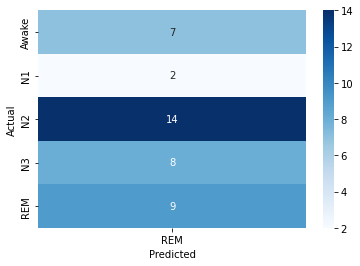

In [76]:
confusion_matrix = pd.crosstab(y_test, predictions_3, rownames=['Actual'], colnames=['Predicted'])

heatmap(confusion_matrix, annot=True, cmap="Blues")
plt.show()